In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from asy import *

In [2]:
r2 = 0
r1 = 0
n = [2.18, 2.14, 2.14]
ng = [2.28, 2.18, 2.18]

lamb_p = 0.75
kp = 2*np.pi/lamb_p

Lamb = 2*np.pi/(n[0]*kp - n[1]*kp/2 + n[2]*kp/2)

k1 = np.linspace(0.4, 0.6, 5000) * kp
L_cavity = np.linspace(0, 3, 300)

R = np.zeros((4, L_cavity.size))

sig = 0.04*kp/2
eta = np.exp(-0.5*(k1-kp/2)**2/sig**2)

for i in range(L_cavity.size):
    print(f'{i+1}/{L_cavity.size}', end='\r')
    J = calculate_J_ppln_counter(k1, kp, L_cavity[i], n, ng, r1, r2, Lamb)
    C0 = np.abs(J[0])**2*eta
    C1 = np.abs(J[1])**2*eta
    C2 = np.abs(J[2])**2*eta
    C3 = np.abs(J[3])**2*eta
    R[0, i] = simpson(x=k1, y=C0)
    R[1, i] = simpson(x=k1, y=C1)
    R[2, i] = simpson(x=k1, y=C2)
    R[3, i] = simpson(x=k1, y=C3)

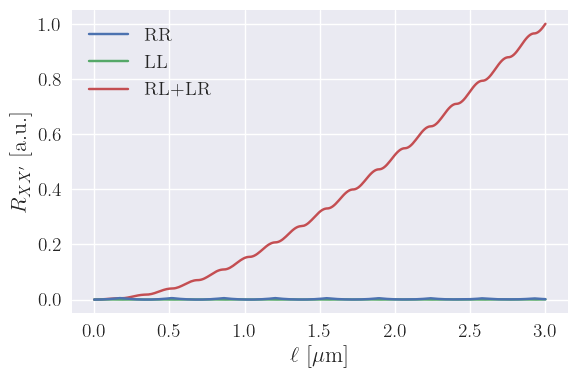

In [3]:
plt.style.use('seaborn-v0_8')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "font.size": 14,
})

fig, ax = plt.subplots(figsize=[6, 4])

ax.plot(L_cavity, R[0]/(R[2]+R[3]).max(), label='RR', zorder=3)
ax.plot(L_cavity, R[1]/(R[2]+R[3]).max(), label='LL', zorder=2)
ax.plot(L_cavity, (R[2]+R[3])/(R[2]+R[3]).max(), label='RL+LR', zorder=1)

ax.legend(fontsize=14)

ax.set_xlabel(r'$\ell$ [$\mu$m]', size=16)
ax.set_ylabel(r"$R_{X X'}$ [a.u.]", size=16)

fig.tight_layout()